Time taken for Map Coloring: 178.46304988861084


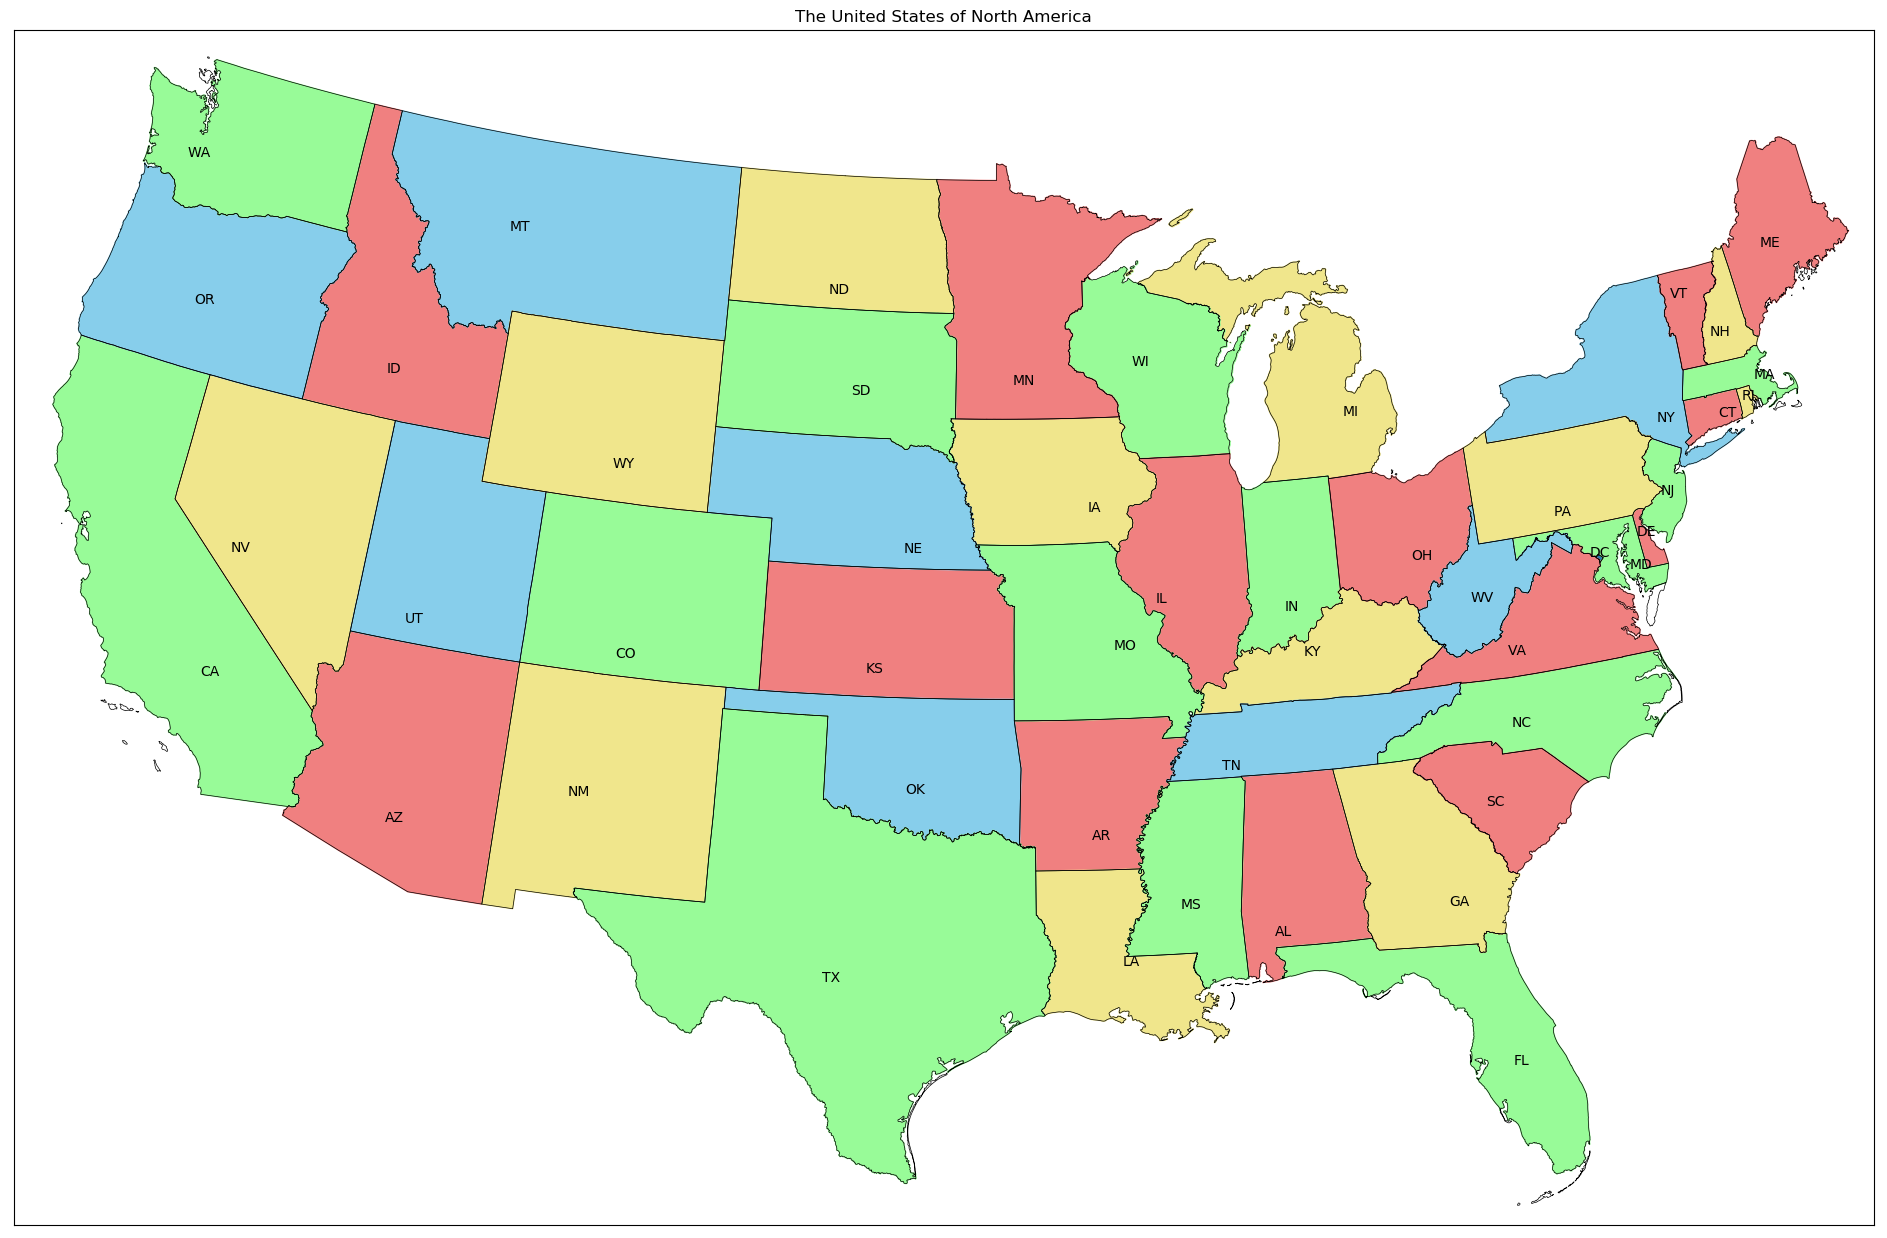

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import random
import json
import time
from IPython import display
from matplotlib.collections import PatchCollection
import numpy as np
from scipy.spatial import ConvexHull
import time

# Python program for solution of M Coloring 
# problem using backtracking 

stateDictionary = {}
colorDictionary = {"1":"lightcoral", "2":"palegreen", "3":"khaki", "4":"skyblue"}
ResultDictionary = {}

class Graph(): 

	def __init__(self, vertices): 
		self.V = vertices 
		self.graph = [[0 for column in range(vertices)]
							for row in range(vertices)] 

	# A utility function to check if the current color assignment 
	# is safe for vertex v 
	def isSafe(self, v, colour, c): 
		for i in range(self.V): 
			if self.graph[v][i] == 1 and colour[i] == c: 
				return False
		return True
	
	# A recursive utility function to solve m 
	# coloring problem 
	def graphColourUtil(self, m, colour, v): 
		if v == self.V: 
			return True

		for c in range(1, m+1): 
			if self.isSafe(v, colour, c) == True: 
				colour[v] = c 
				if self.graphColourUtil(m, colour, v+1) == True: 
					return True
				colour[v] = 0

	def graphColouring(self, m): 
		colour = [0] * self.V 
		if self.graphColourUtil(m, colour, 0) == False: 
			return False

		# Print the solution 
		print("Solution exist and Following are the assigned colours:")
		for idx, val in enumerate(colour): 
			 ResultDictionary[stateDictionary[str(idx+1)]] = colorDictionary[str(val)]
		return True

def map_coloring():
    #plt.figure(figsize=(18,12))
    fig=plt.figure(figsize=(24, 20), dpi= 100, facecolor='w', edgecolor='k')
    
    # create the map
    map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # load the shapefile, use the name 'states'
    map.readshapefile('/Users/amitshetty/Downloads/basemap-1.1.0/examples/st99_d00', name='states', drawbounds=True)
    # Amit
    
    short_state_names = {
        #'Alaska':'AK',
        'Alabama':'AL',
        'Arkansas':'AR',
        'American Samoa':'AS',
        'Arizona':'AZ',
        'California':'CA',
        'Colorado':'CO',
        'Connecticut':'CT',
        'District of Columbia':'DC',
        'Delaware':'DE',
        'Florida':'FL',
        'Georgia':'GA',
        'Guam':'GU',
        #'Hawaii':'HI',
        'Iowa':'IA',
        'Idaho':'ID',
        'Illinois':'IL',
        'Indiana':'IN',
        'Kansas':'KS',
        'Kentucky':'KY',
        'Louisiana':'LA',
        'Massachusetts':'MA',
        'Maryland':'MD',
        'Maine':'ME',
        'Michigan':'MI',
        'Minnesota':'MN',
        'Missouri':'MO',
        'Northern Mariana Islands':'MP',
        'Mississippi':'MS',
        'Montana':'MT',
        'North Carolina':'NC',
        'North Dakota':'ND',
        'Nebraska':'NE',
        'New Hampshire':'NH',
        'New Jersey':'NJ',
        'New Mexico':'NM',
        'Nevada':'NV',
        'New York':'NY',
        'Ohio':'OH',
        'Oklahoma':'OK',
        'Oregon':'OR',
        'Pennsylvania':'PA',
        #'Puerto Rico':'PR',
        'Rhode Island':'RI',
        'South Carolina':'SC',
        'South Dakota':'SD',
        'Tennessee':'TN',
        'Texas':'TX',
        'Utah':'UT',
        'Virginia':'VA',
        'Virgin Islands':'VI',
        'Vermont':'VT',
        'Washington':'WA',
        'Wisconsin':'WI',
        'West Virginia':'WV',
        'Wyoming':'WY'
    }

    printed_names = []
    mi_index = 0
    wi_index = 0
    for shapedict,state in zip(map.states_info, map.states):
        draw_state_name = True
        short_name = short_state_names.get(shapedict['NAME'])
        if short_name in printed_names and short_name not in ['MI', 'WI']: 
            continue
        if short_name == 'MI':
            if mi_index != 3:
                draw_state_name = False
            mi_index += 1
        if short_name == 'WI':
            if wi_index != 2:
                draw_state_name = False
            wi_index += 1
        # center of polygon
        x, y = np.array(state).mean(axis=0)
        hull = ConvexHull(state)
        hull_points = np.array(state)[hull.vertices]
        #center of convex hull over the polygon points
        x, y = hull_points.mean(axis=0)
        if draw_state_name:
            # You have to align x,y manually to avoid overlapping for little states
            plt.text(x+.1, y, short_name, ha="center")
        printed_names += [short_name,] 
    plt.title('The United States of North America')
    #plt.show()
    
    # Amit
    
    # collect the state names from the shapefile attributes so we can
    # look up the shape obect for a state by it's name
    state_names = []
    for shape_dict in map.states_info:
        state_names.append(shape_dict['NAME'])

    ax = plt.gca() # get current axes instance
    
    patches = []
    for info, shape in zip(map.states_info,map.states):
        if info['NAME'] == 'Michigan':
            color_for_unique_borders = ResultDictionary.get('Michigan')
            patches.append(Polygon(np.array(shape), True))
            ax.add_collection(PatchCollection(patches, facecolor= color_for_unique_borders, edgecolor=color_for_unique_borders))
            display.display(plt.gcf())
            display.clear_output(wait=True)
        elif info['NAME'] == 'Wisconsin':
            patches.clear()
            color_for_unique_borders = ResultDictionary.get('Wisconsin')
            patches.append(Polygon(np.array(shape), True))
            ax.add_collection(PatchCollection(patches, facecolor= color_for_unique_borders, edgecolor=color_for_unique_borders))
            display.display(plt.gcf())
            display.clear_output(wait=True)
#         elif info['NAME'] == 'Alaska':
#         # Alaska is too big. Scale it down to 35% first, then transate it. 
#             seg = list(map(lambda x,y : (0.35*x + 1100000, 0.35*y-1300000), shape))
#             poly = Polygon(seg,facecolor='orange',edgecolor='orange')
#             ax.add_patch(poly)
#         elif info['NAME'] == 'Hawaii':
#             seg = list(map(lambda x,y : (x + 5100000, y-900000), shape))
#             poly = Polygon(seg,facecolor='violet',edgecolor='violet')
#             ax.add_patch(poly)
            
    for state_name in sorted(set(state_names)):
        # color_for_state = random.choice(colors)
        if state_name not in ['Wisconsin','Michigan']:
            color_for_state = ResultDictionary.get(state_name)
            seg = map.states[state_names.index(state_name)]
            poly = Polygon(seg, facecolor=color_for_state,edgecolor=color_for_state)
            ax.add_patch(poly)
            display.display(plt.gcf())
            display.clear_output(wait=True)
            #time.sleep(1)
    
def main():
    stateDictionary["1"] = "Alabama"
    stateDictionary["2"] = "Alaska"
    stateDictionary["3"] = "Arizona"
    stateDictionary["4"] = "Arkansas"
    stateDictionary["6"] = "Colorado"
    stateDictionary["5"] = "California"
    stateDictionary["7"] = "Connecticut"
    stateDictionary["8"] = "Delaware"
    stateDictionary["9"] = "Florida"
    stateDictionary["10"] = "Georgia"
    stateDictionary["11"] = "Hawaii"
    stateDictionary["12"] = "Idaho"
    stateDictionary["13"] = "Illinois"
    stateDictionary["14"] = "Indiana"
    stateDictionary["15"] = "Iowa"
    stateDictionary["16"] = "Kansas"
    stateDictionary["17"] = "Kentucky"
    stateDictionary["18"] = "Louisiana"
    stateDictionary["19"] = "Maine"
    stateDictionary["20"] = "Maryland"
    stateDictionary["21"] = "Massachusetts"
    stateDictionary["22"] = "Michigan"
    stateDictionary["23"] = "Minnesota"
    stateDictionary["24"] = "Mississippi"
    stateDictionary["25"] = "Missouri"
    stateDictionary["26"] = "Montana"
    stateDictionary["27"] = "Nebraska"
    stateDictionary["28"] = "Nevada"
    stateDictionary["29"] = "New Hampshire"
    stateDictionary["30"] = "New Jersey"
    stateDictionary["31"] = "New Mexico"
    stateDictionary["32"] = "New York"
    stateDictionary["33"] = "North Carolina"
    stateDictionary["34"] = "North Dakota"
    stateDictionary["35"] = "Ohio"
    stateDictionary["36"] = "Oklahoma"
    stateDictionary["37"] = "Oregon"
    stateDictionary["38"] = "Pennsylvania"
    stateDictionary["39"] = "Rhode Island"
    stateDictionary["40"] = "South Carolina"
    stateDictionary["41"] = "South Dakota"
    stateDictionary["42"] = "Tennessee"
    stateDictionary["43"] = "Texas"
    stateDictionary["44"] = "Utah"
    stateDictionary["45"] = "Vermont"
    stateDictionary["46"] = "Virginia"
    stateDictionary["47"] = "Washington"
    stateDictionary["48"] = "West Virginia"
    stateDictionary["49"] = "Wisconsin"
    stateDictionary["50"] = "Wyoming"
    # create the state and integer mapping dictionary
    #createStateDictionary()

    # Driver Code 
    g = Graph(50) #number of states 48

    g.graph =  [[0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0], 
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0],
		   [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
		   [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0],
		   [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0],
		   [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0],
		   [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0], 
		   [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0],	  
		   [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0],
		   [0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0],		  
		   [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],
		   [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],
		   [0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0],		
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
		   [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0], 
		   [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0],	
		   [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0],
		   [0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],		  	   		   
		   [0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
		   [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
		   [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],		  	   		   
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
		   [1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
		   [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0],	  	   		   
		   [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0]] 

    m=4 ## chromataic number
    start = time.time()
    g.graphColouring(m)
    #end = time.time() 
    #print("Time taken for Backtracking: {}".format(str(end-start)))
    # Map Coloring and Animation Section
    #start = time.time()
    map_coloring()
    end = time.time()
    print("Time taken for Map Coloring: {}".format(str(end-start)))
    #print('Done')
    
#     for key, value in ResultDictionary.items():
#         print(key + " ==> " + value, end='\n')
    
if __name__ == "__main__":
    main()